In [2]:
import GPflow
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [48]:
x1 = list()
y1 = list()
with open("result.csv", "r") as ins:
    for line in ins:
        tokens = line.split(',')
        x1.append(int(tokens[2]))
        y1.append(int(tokens[3]))

x2 = np.asarray(x1).astype('f')
y2 = np.asarray(y1).astype('f')

In [49]:
y2_scaled = y2 / y2.max()
y2_scaled

array([ 0.04542462,  0.02172482,  0.01744569,  0.03061225,  0.05464121,
        0.10961159,  0.23765635,  0.32949308,  0.25674787,  0.17511521,
        0.1570112 ,  0.18005267,  0.15437788,  0.19453588,  0.24226464,
        0.31830153,  0.37919685,  0.41540489,  0.36932191,  0.33508888,
        0.19651087,  0.28900594,  0.17412771,  0.10434496,  0.05299539,
        0.02699144,  0.01942067,  0.02633311,  0.06451613,  0.11323239,
        0.25839368,  0.36175114,  0.30513495,  0.21593153,  0.21658987,
        0.23238973,  0.20803159,  0.23337722,  0.2857143 ,  0.37458855,
        0.43219224,  0.52666229,  0.41211322,  0.35747203,  0.37623435,
        0.32718894,  0.21000658,  0.11454905,  0.0638578 ,  0.03489137,
        0.02172482,  0.04279131,  0.06352863,  0.11652403,  0.24687295,
        0.33640552,  0.28439763,  0.19453588,  0.18367347,  0.180711  ,
        0.20375247,  0.25213957,  0.30743912,  0.41046742,  0.47333771,
        0.53982884,  0.5358789 ,  0.45227122,  0.52369982,  0.56

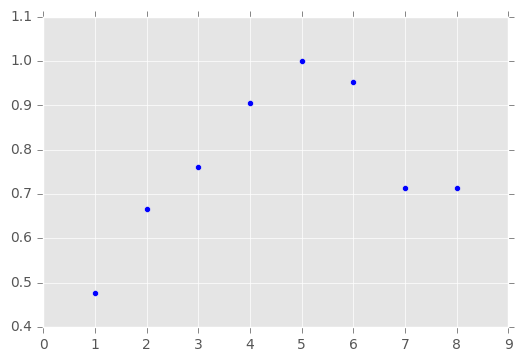

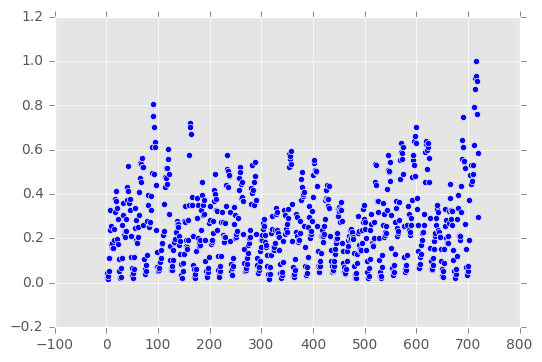

In [50]:
y=np.array([2.0e4, 2.8e4, 3.2e4, 3.8e4, 4.2e4, 4.0e4, 3.0e4, 3.0e4]).astype('f')
y0 = y/y.max()
x = np.arange(1,1+len(y)).astype('f')
plt.scatter(x,y0)
plt.show()

plt.scatter(x1,y2_scaled)

In [57]:
k = GPflow.kernels.PeriodicKernel(1, period=24.0)
m = GPflow.gpr.GPR(x2[:,None], y2_scaled[:,None], kern=k)
m.likelihood.variance = 0.01

[[   1.]
 [ 101.]
 [ 201.]
 [ 301.]
 [ 401.]
 [ 501.]
 [ 601.]
 [ 701.]]


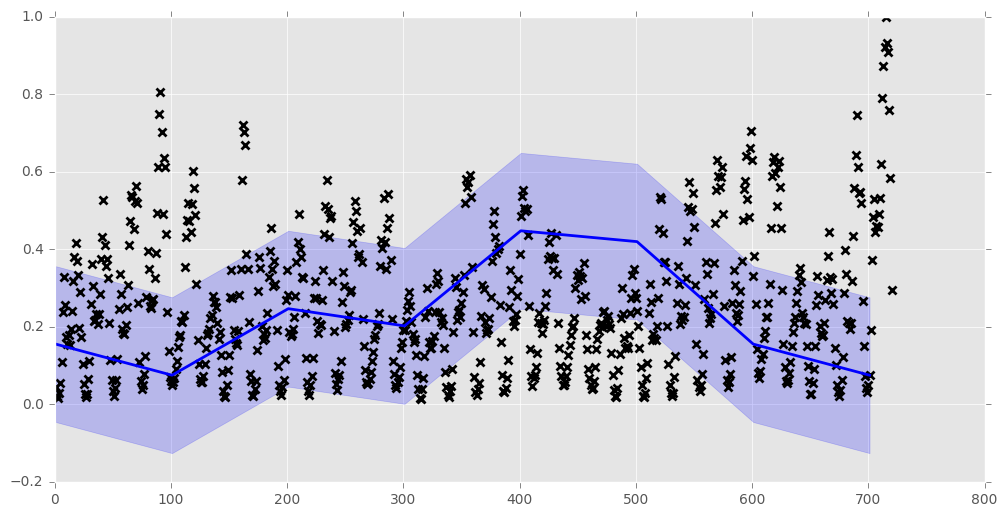

In [59]:
def plot(m):
    xx = np.arange(x2.min(), x2.max(), 100)[:,None]
    print(xx)
    mean, var = m.predict_y(xx)
    plt.figure(figsize=(12, 6))
    plt.plot(x2, y2_scaled, 'kx', mew=2)
    plt.plot(xx, mean, 'b', lw=2)
    plt.fill_between(xx[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color='blue', alpha=0.2)
plot(m)

In [9]:
k_daily = GPflow.kernels.PeriodicKernel(1, period=24.0)
k_weekly = GPflow.kernels.PeriodicKernel(1, period=24.0*7.0)
k_growth = GPflow.kernels.Linear(1)
k_total = k_daily+k_weekly+k_growth

In [10]:
k_total

Name,values,prior,constraint
unnamed.periodickernel_2.period,[ 168.],None,+ve
unnamed.periodickernel_2.lengthscales,[ 1.],None,+ve
unnamed.periodickernel_2.variance,[ 1.],None,+ve
unnamed.periodickernel_1.variance,[ 1.],None,+ve
unnamed.periodickernel_1.period,[ 24.],None,+ve
unnamed.periodickernel_1.lengthscales,[ 1.],None,+ve
unnamed.linear.variance,[ 1.],None,+ve
